In [81]:
import os
#import numpy as np
#import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
print("Num GPUs Available", len(tf.config.experimental.list_physical_devices('GPU')))

Please install GPU version of TF
Num GPUs Available 0


In [63]:
path = 'PokemonData/Abra/2eb2a528f9a247358452b3c740df69a0.jpg'
img = Image.open(path)
array = np.array(img)
print(array.shape)

(238, 226, 3)


In [64]:
path = 'PokemonData/'
labels = os.listdir(path)

#print(len(labels))
#print(labels)

img_w = 100
img_h = 100

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = datagen.flow_from_directory(path, 
                                         target_size=(img_w, img_h), 
                                         batch_size=5, 
                                         subset='training')

val_data = datagen.flow_from_directory(path, 
                                       target_size=(img_w, img_h), 
                                       batch_size=5, 
                                       subset='validation')

Found 6205 images belonging to 150 classes.
Found 615 images belonging to 150 classes.


Let's plot one batch of training data

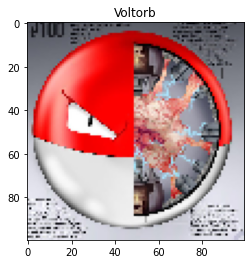

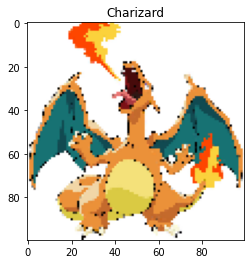

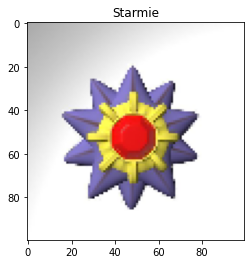

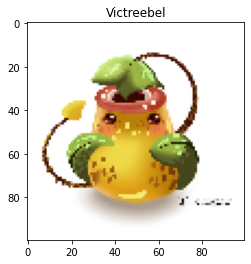

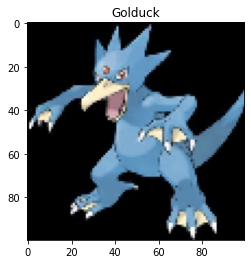

In [65]:
x, y = next(train_data)

#print(x)
#print(y)

for x,y in zip(x, y):
    plt.imshow(x)
    plt.title(labels[np.argmax(y)])
    plt.show()

In [66]:

model = keras.Sequential([
    #keras.layers.Conv2D(filters=256, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    #keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=200, activation='relu'),
    keras.layers.Dense(units=len(labels), activation='softmax')
])

model.compile(optimizer='adam',
             loss=tf.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=10,
                    #steps_per_epoch=num_train_samples // batch_size,
                    #validation_data=val_data,
                    #validation_steps=num_test_samples // batch_size, 
                    verbose=1)

Epoch 1/10
1241/1241 [==============================] - 150s 120ms/step - loss: 5.4866 - accuracy: 0.0083
Epoch 2/10
1241/1241 [==============================] - 149s 120ms/step - loss: 4.3669 - accuracy: 0.0423
Epoch 3/10
1241/1241 [==============================] - 150s 121ms/step - loss: 3.3680 - accuracy: 0.1869
Epoch 4/10
1241/1241 [==============================] - 149s 120ms/step - loss: 2.2222 - accuracy: 0.4267
Epoch 5/10
1241/1241 [==============================] - 148s 119ms/step - loss: 1.3834 - accuracy: 0.6339
Epoch 6/10
1241/1241 [==============================] - 156s 126ms/step - loss: 0.8637 - accuracy: 0.7793
Epoch 7/10
1241/1241 [==============================] - 153s 123ms/step - loss: 0.5631 - accuracy: 0.8601
Epoch 8/10
1241/1241 [==============================] - 154s 124ms/step - loss: 0.3577 - accuracy: 0.9110
Epoch 9/10
1241/1241 [==============================] - 153s 123ms/step - loss: 0.2869 - accuracy: 0.9296
Epoch 10/10
1241/1241 [=======================

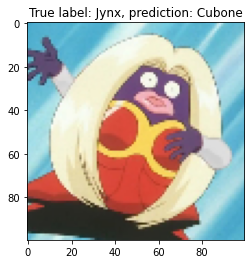

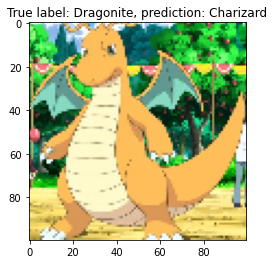

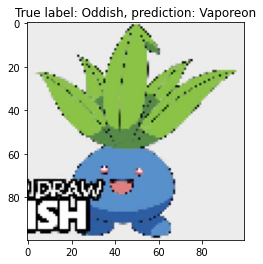

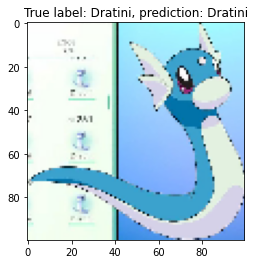

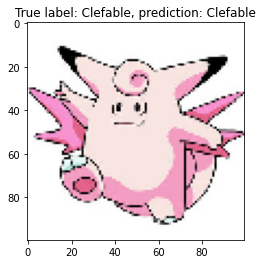

123/123 [==============================] - 3s 26ms/step - loss: 7.7714 - accuracy: 0.2276


[7.771393299102783, 0.22764228284358978]

In [79]:
x, y = next(val_data)

pred = model.predict(x)

for x, y, pred in zip(x, y, pred):
    plt.imshow(x)
    plt.title("True label: {}, prediction: {}".format(labels[y.argmax()], labels[pred.argmax()]))
    plt.show()
    
model.evaluate(val_data)

#pred = model.predict(val_data)


In [ ]:
model = keras.Sequential([
    #keras.layers.Conv2D(filters=256, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(img_w, img_h, 3), activation='relu'),
    #keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=200, activation='relu'),
    keras.layers.Dense(units=len(labels), activation='softmax')
])

model.compile(optimizer='adam',
             loss=tf.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=10,
                    #steps_per_epoch=num_train_samples // batch_size,
                    #validation_data=val_data,
                    #validation_steps=num_test_samples // batch_size, 
                    verbose=1)